<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_2_2_Logistic_regression_with_scikit_learn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Запит до Gemini 1

Потрібно визначити цільову змінну Exited за допомогою логістичної регресії

Пропусків в даних немає

На що потрібно звернути увагу при препроцесингу даних?

які параметри доцільно використати при кодуванні і масштабуванні ознак?

Як оптимально налаштувати модель логістичної регресії для цієї задачі?

Привіт! Чудова задача для логістичної регресії. Вона ідеально підходить для прогнозування бінарної цільової змінної, такої як `Exited` (відтік клієнтів).

Ось на що варто звернути увагу при препроцесингу даних, які параметри використати для кодування та масштабування, а також як оптимально налаштувати модель логістичної регресії.

---

## Препроцесинг даних: На що звернути увагу

Перед тим як подавати дані моделі логістичної регресії, важливо правильно їх підготувати.

1.  **Видалення непотрібних стовпців:**
    * **ID:** Цей стовпець є просто унікальним ідентифікатором рядка і не несе жодної інформації для моделі, тому його слід видалити.
    * **Customer ID:** Ви вже зазначили, що його потрібно видалити через дублікати та відсутність прогностичної цінності. Абсолютно вірно.
    * **Surname:** Прізвище клієнта зазвичай не є прогностичною ознакою для відтоку і може створювати зайвий шум або навіть призвести до витоку даних, якщо там є якась прихована інформація. Краще його видалити.

2.  **Обробка категоріальних ознак:**
    * Логістична регресія працює з числовими даними. Категоріальні ознаки, такі як `Geography` (Країна) та `Gender` (Стать), потрібно перетворити на числові.

3.  **Масштабування числових ознак:**
    * Логістична регресія, як і багато інших алгоритмів, чутлива до масштабу числових ознак. Ознаки з більшими значеннями можуть домінувати над ознаками з меншими значеннями, що може призвести до менш ефективного навчання моделі. Масштабування вирівнює діапазони значень ознак.

4.  **Визначення цільової змінної:**
    * `Exited` (`1` = залишив банк, `0` = не залишив) - це ваша цільова змінна, яку модель буде намагатися передбачити. Вона вже має бінарний формат, що ідеально підходить для логістичної регресії.

5.  **Розбиття даних:**
    * Завжди розбивайте дані на навчальний (training) та тестовий (testing) набори. Це дозволяє оцінити, наскільки добре ваша модель узагальнює дані, які вона "ніколи не бачила". Стандартне співвідношення 70/30 або 80/20.

---

## Параметри для кодування та масштабування ознак

### 1. Кодування категоріальних ознак

* **`Geography` (Франція, Іспанія, Німеччина):**
    * **Метод:** **One-Hot Encoding** (Даммі-змінні). Оскільки між країнами немає природного порядку (Франція не "більша" за Іспанію), One-Hot Encoding є найкращим вибором. Він створить нові бінарні стовпці (наприклад, `Geography_France`, `Geography_Spain`, `Geography_Germany`), де 1 означає належність до цієї країни, а 0 - ні.
    * **Важливий аспект:** Уникайте "даммі-пастки" (dummy variable trap). При One-Hot Encoding з `N` категорій зазвичай створюють `N-1` нових стовпців. Наприклад, якщо у вас є `Geography_France`, `Geography_Spain`, то `Geography_Germany` буде зрозуміло, коли обидва перші стовпці дорівнюють 0. Це запобігає мультиколінеарності.

* **`Gender` (Чоловік, Жінка):**
    * **Метод:** Також **One-Hot Encoding**, або простий **бінарний кодер** (наприклад, `Male` = 1, `Female` = 0). Оскільки тут лише дві категорії, ці методи по суті однакові. Можна перетворити "Чоловік" на 1, "Жінка" на 0.

### 2. Масштабування числових ознак

Для логістичної регресії рекомендується використовувати **стандартизацію**.

* **Метод:** **StandardScaler**. Цей метод масштабує ознаки так, щоб вони мали нульове середнє (`mean=0`) та одиничне стандартне відхилення (`std=1`).
* **Ознаки для масштабування:**
    * `Credit Score`
    * `Age`
    * `Tenure`
    * `Balance`
    * `NumOfProducts`
    * `EstimatedSalary`
* **Ознаки, які НЕ потребують масштабування:**
    * `HasCrCard` (вже бінарна, 0 або 1)
    * `IsActiveMember` (вже бінарна, 0 або 1)
    * Новостворені даммі-змінні з `Geography` та `Gender`.

**Важливо:** Завжди застосовуйте `StandardScaler.fit()` лише до навчальних даних, а потім використовуйте `StandardScaler.transform()` для обох - навчальних та тестових даних. Це запобігає витоку інформації з тестового набору в навчальний процес.

---

## Оптимальне налаштування моделі логістичної регресії

Логістична регресія є досить простою, але ефективною моделлю. Її "оптимальне" налаштування часто включає кілька кроків.

1.  **Вибір класу моделі:**
    * Використовуйте `LogisticRegression` з бібліотеки `scikit-learn`.

2.  **Регуляризація:**
    * Логістична регресія в `scikit-learn` за замовчуванням застосовує **L2-регуляризацію** (`penalty='l2'`). Це допомагає запобігти перенавчанню моделі, зменшуючи величину коефіцієнтів.
    * **Параметр `C`**: Це обернена сила регуляризації. Менші значення `C` означають сильнішу регуляризацію (більше "штрафу" за великі коефіцієнти), а більші значення `C` - слабшу. За замовчуванням `C=1.0`.
    * **Налаштування `C`**: Ви можете спробувати різні значення `C` (наприклад, 0.01, 0.1, 1, 10, 100) за допомогою методів крос-валідації.

3.  **Оптимізатор:**
    * Параметр `solver` визначає алгоритм, який використовується для оптимізації моделі (знаходження оптимальних коефіцієнтів). Для більшості випадків, особливо для невеликих та середніх датасетів, добре підходять:
        * `'liblinear'` (добре для невеликих наборів даних, підтримує L1/L2 регуляризацію)
        * `'lbfgs'` (хороший вибір за замовчуванням для багатьох задач, підтримує лише L2)
        * `'saga'` (підходить для великих наборів даних та L1/L2/Elastic-Net регуляризації)
    * Почніть з `'lbfgs'` або `'liblinear'`.

4.  **Обробка незбалансованих класів (Class Imbalance):**
    * **Увага!** Відтік клієнтів (коли `Exited=1`) часто є меншістю в наборі даних. Якщо відтоку набагато менше, ніж тих, хто залишився (наприклад, 10% проти 90%), модель може навчитися просто передбачати "0" для всіх, досягаючи високої точності, але будучи марною.
    * **Рішення:**
        * **`class_weight='balanced'`**: Це найпростіший і часто дуже ефективний спосіб. Він автоматично коригує ваги класів у функції втрат пропорційно частоті їх появи у навчальних даних. Це дає більший "штраф" за неправильну класифікацію міноритарного класу.
        * **Передискретизація (Resampling):** Методи, такі як Oversampling міноритарного класу (наприклад, SMOTE) або Undersampling мажоритарного класу. Це складніший, але потужний підхід.

5.  **Оцінка моделі:**
    * Оскільки класи можуть бути незбалансованими, **accuracy (точність)** не є найкращою метрикою.
    * Використовуйте метрики, які краще підходять для незбалансованих даних:
        * **Precision, Recall, F1-Score**: Особливо F1-Score, який є гарним балансом між Precision та Recall.
        * **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: Ця метрика показує, наскільки добре модель розрізняє класи, незалежно від порогу класифікації. Вищий ROC AUC (ближче до 1) означає кращу модель.
        * **Confusion Matrix**: Допомагає візуалізувати кількість правильних/неправильних класифікацій для кожного класу.

6.  **Крос-валідація (Cross-Validation):**
    * Завжди використовуйте крос-валідацію (наприклад, `KFold` або `StratifiedKFold` для незбалансованих класів) для більш надійної оцінки продуктивності моделі та для підбору гіперпараметрів (`C`, `solver`).
    * `GridSearchCV` або `RandomizedSearchCV` можуть автоматизувати цей процес.

### Приклад послідовності кроків:

```python
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

# Припустимо, у вас є DataFrame 'df' з вашими даними

# 1. Створення фіктивних даних для прикладу (замініть на ваші реальні дані)
data = {
    'ID': range(100),
    'Customer ID': [i % 50 for i in range(100)],
    'Surname': [f'Surname_{i}' for i in range(100)],
    'Credit Score': np.random.randint(350, 850, 100),
    'Geography': np.random.choice(['France', 'Spain', 'Germany'], 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Age': np.random.randint(18, 92, 100),
    'Tenure': np.random.randint(0, 10, 100),
    'Balance': np.random.uniform(0, 250000, 100),
    'NumOfProducts': np.random.randint(1, 4, 100),
    'HasCrCard': np.random.randint(0, 2, 100),
    'IsActiveMember': np.random.randint(0, 2, 100),
    'EstimatedSalary': np.random.uniform(100, 200000, 100),
    'Exited': np.random.randint(0, 2, 100) # Цільова змінна
}
df = pd.DataFrame(data)

# Імітуємо незбалансованість: зробимо більшість Exited = 0
df['Exited'] = np.random.choice([0, 1], size=100, p=[0.85, 0.15])


# 2. Видалення непотрібних стовпців
df = df.drop(['ID', 'Customer ID', 'Surname'], axis=1)

# 3. Розбиття на ознаки (X) та цільову змінну (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4. Визначення категоріальних та числових ознак
categorical_features = ['Geography', 'Gender']
numerical_features = [
    'Credit Score', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary' # HasCrCard та IsActiveMember вже бінарні, не масштабуємо
]

# 5. Створення препроцесора за допомогою ColumnTransformer
# One-Hot Encoding для категоріальних
# StandardScaler для числових
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features) # drop='first' для уникнення даммі-пастки
    ],
    remainder='passthrough' # Залишити інші стовпці (HasCrCard, IsActiveMember) як є
)

# 6. Створення пайплайну: препроцесор + модель логістичної регресії
# Використовуємо class_weight='balanced' для обробки незбалансованих класів
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])

# 7. Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y для збереження співвідношення класів

# 8. Налаштування гіперпараметрів за допомогою GridSearchCV (або RandomizedSearchCV)
# Визначаємо сітку параметрів для пошуку
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Сила регуляризації
    'classifier__solver': ['liblinear', 'lbfgs'] # Оптимізатор
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
# scoring='roc_auc' - хороша метрика для незбалансованих класів
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nНайкращі параметри: {grid_search.best_params_}")
print(f"Найкращий ROC AUC на крос-валідації: {grid_search.best_score_:.4f}")

# 9. Оцінка моделі на тестовій вибірці
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Ймовірність для класу 1

print("\nЗвіт по класифікації на тестових даних:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC на тестових даних: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Виведемо Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
```

Цей код забезпечує повний цикл від препроцесингу до налаштування та оцінки моделі логістичної регресії, враховуючи ключові аспекти, які я описав. Не забудьте замінити фіктивні дані `df` на ваші реальні дані!

Успіхів з вашим проектом!

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df.iloc[:, 3:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [ ]:
# 3. Розбиття на ознаки (X) та цільову змінну (y)
X = df.iloc[:, 3:].drop('Exited', axis=1)
y = df['Exited']


In [ ]:
X.shape, y.shape

((15000, 10), (15000,))

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86


In [ ]:

# 4. Визначення категоріальних та числових ознак
# Ми можемо динамічно визначити ці списки, щоб уникнути помилок через опечатки або зміни в даних
all_features = X.columns.tolist() # Отримуємо всі колонки X

numerical_features = [
    col for col in all_features if X[col].dtype in ['int64', 'float64'] and col not in ['HasCrCard', 'IsActiveMember']
]
categorical_features = [
    col for col in all_features if X[col].dtype == 'object'
]
# Бінарні ознаки, які вже є числовими (0 або 1)
binary_features = ['HasCrCard', 'IsActiveMember']

# 5. Створення препроцесора за допомогою ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), categorical_features),
        ('bin', 'passthrough', binary_features) # Просто пропускаємо бінарні ознаки
    ],
    # remainder='drop' - якщо є інші колонки, які не вказані, видалити їх
    # remainder='passthrough' - залишити інші колонки без змін (не в цьому випадку, бо всі колонки вказані)
)

# 6. Створення пайплайну: препроцесор + модель логістичної регресії
# Використовуємо class_weight='balanced' для обробки незбалансованих класів
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])

# 7. Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y для збереження співвідношення класів


In [ ]:
# 8. Налаштування гіперпараметрів за допомогою GridSearchCV (або RandomizedSearchCV)
# Визначаємо сітку параметрів для пошуку
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Сила регуляризації (обернена)
    'classifier__solver': ['liblinear', 'lbfgs'] # Оптимізатор
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
# scoring='roc_auc' - хороша метрика для незбалансованих класів
print("Запускаємо GridSearchCV для пошуку найкращих параметрів...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train) # Тепер цей рядок має спрацювати коректно

print(f"\nНайкращі параметри: {grid_search.best_params_}")
print(f"Найкращий ROC AUC на крос-валідації: {grid_search.best_score_:.4f}")

Запускаємо GridSearchCV для пошуку найкращих параметрів...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Найкращі параметри: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Найкращий ROC AUC на крос-валідації: 0.8828


In [ ]:
# 9. Оцінка моделі на тестовій вибірці
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Ймовірність для класу 1

# Виведемо Confusion Matrix
print('Матриця на тренувальних даних')
y_pred_train = best_model.predict(X_train)
cm = confusion_matrix(y_pred_train, y_train, normalize='true').round(2)
print("\nConfusion Matrix:")
print(cm)


print("\nЗвіт по класифікації на тестових даних:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC на тестових даних: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Виведемо Confusion Matrix
cm = confusion_matrix(y_pred, y_test, normalize='true').round(2)
print("\nConfusion Matrix:")
print(cm)

Матриця на тренувальних даних

Confusion Matrix:
[[0.94 0.06]
 [0.45 0.55]]

Звіт по класифікації на тестових даних:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      2390
         1.0       0.52      0.81      0.63       610

    accuracy                           0.81      3000
   macro avg       0.73      0.81      0.75      3000
weighted avg       0.86      0.81      0.82      3000

ROC AUC на тестових даних: 0.8799

Confusion Matrix:
[[0.94 0.06]
 [0.48 0.52]]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
# определение модели
model = XGBClassifier()

In [ ]:
# определение наборов данных для оценки итераций
evalset = [(X_train, y_train), (X_test, y_test)]

In [ ]:
#################
model = XGBClassifier(
    learning_rate=0.02,
    n_estimators=10,
    objective="binary:logistic",
    nthread=3,
    tree_method="gpu_hist"  # благодаря этому задействуется GPU.
)

import time
print('Lets GO!')
start = time.ctime()
# обучение модели
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

end = time.ctime()
print('all done!')
print('started', start)
print('finished', end)

# submission_log_reg_3   score   **0,93246**

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, classification_report, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Area under ROC score on Training dataset: 0.832


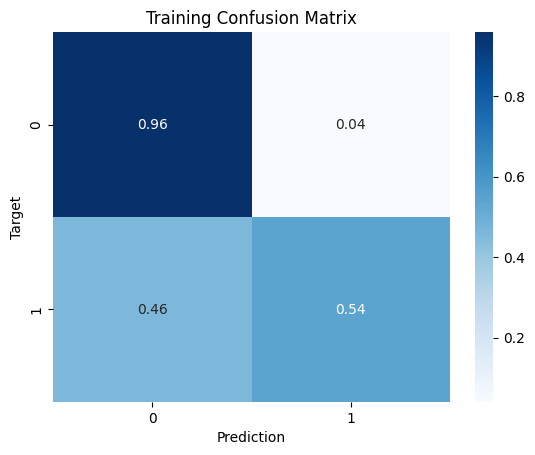

Area under ROC score on Validation dataset: 0.817


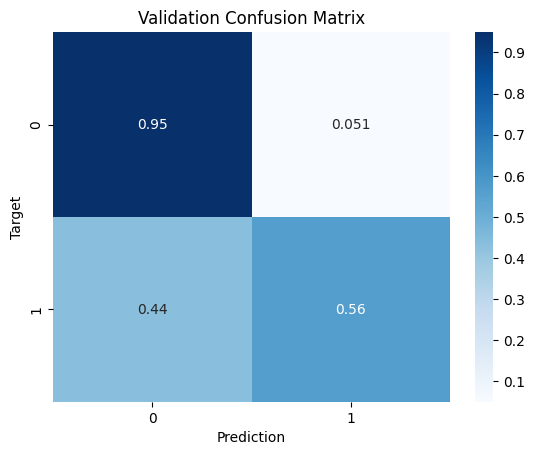

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2390
         1.0       0.74      0.56      0.64       610

    accuracy                           0.87      3000
   macro avg       0.82      0.76      0.78      3000
weighted avg       0.86      0.87      0.86      3000



['bank-customer_pipeline.joblib']

In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv', index_col=0)

train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[2:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(preds, targets)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.3f}")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, 'Validation')

# Звіт про класифікацію
print(classification_report(val_targets, model_pipeline.predict(val_inputs)))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'bank-customer_pipeline.joblib')

In [ ]:
?LogisticRegression

Area under ROC score on Training dataset: 0.870


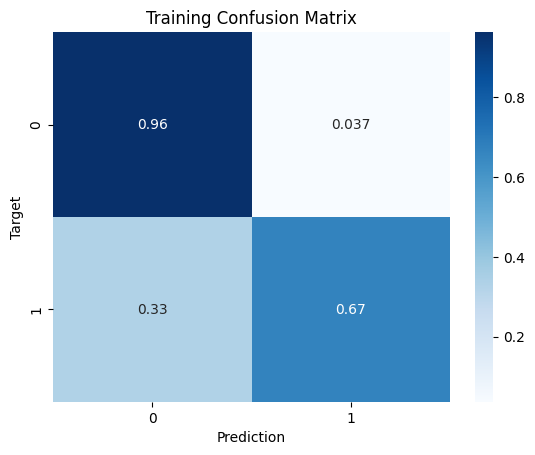

Area under ROC score on Validation dataset: 0.857


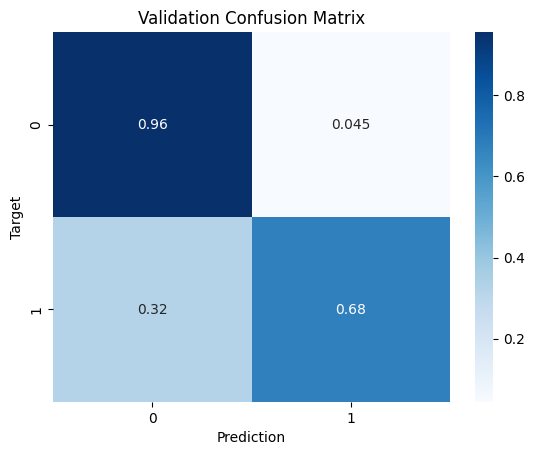

              precision  recall  f1-score   support
0.0               0.920   0.955     0.937  2390.000
1.0               0.794   0.675     0.730   610.000
accuracy          0.898   0.898     0.898     0.898
macro avg         0.857   0.815     0.834  3000.000
weighted avg      0.895   0.898     0.895  3000.000


['bank-customer_pipeline_pol5.joblib']

In [ ]:
# Створюємо трансформери для числових колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('polynomial_features', PolynomialFeatures(degree=5))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_pol5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline_pol5.fit(train_inputs, train_targets)

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline_pol5, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline_pol5, val_inputs, val_targets, 'Validation')

# # Звіт про класифікацію
# print(classification_report(val_targets, model_pipeline_pol5.predict(val_inputs)))

# Assuming val_targets are your true labels and model_pipeline.predict(val_inputs) are your predictions
report = classification_report(val_targets, model_pipeline_pol5.predict(val_inputs), output_dict=True)
df = pd.DataFrame(report).transpose()

# Printing with 3 decimal places
print(df.round(3))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline_pol5, 'bank-customer_pipeline_pol5.joblib')

In [ ]:
subm_df  = pd.read_csv('/content/sample_submission.csv')

test_df = pd.read_csv('/content/test.csv')
test_pred = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df['Exited'] = model_pipeline_pol5.predict_proba(test_df)[:, 1]

In [ ]:
subm_df.head()

,id,Exited
0,15000,0.079727
1,15001,0.015819
2,15002,0.064174
3,15003,0.411508
4,15004,0.024556


# submission_log_reg_4 score 0.93270

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC score on Training dataset: 0.871


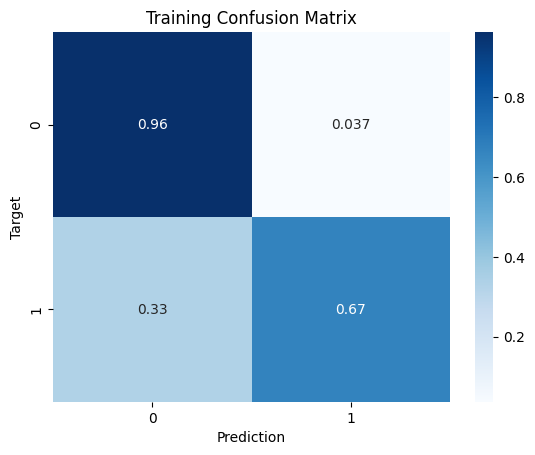

Area under ROC score on Validation dataset: 0.858


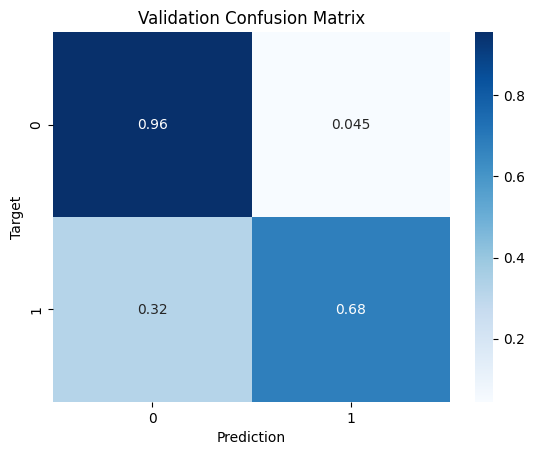

              precision  recall  f1-score   support
0.0               0.921   0.955     0.938  2390.000
1.0               0.795   0.680     0.733   610.000
accuracy          0.899   0.899     0.899     0.899
macro avg         0.858   0.818     0.836  3000.000
weighted avg      0.896   0.899     0.896  3000.000


['bank-customer_pipeline_pol5.joblib']

In [ ]:
# Створюємо трансформери для числових колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('polynomial_features', PolynomialFeatures(degree=5))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_pol5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', penalty = 'l2'))

])

# Тренуємо пайплайн
model_pipeline_pol5.fit(train_inputs, train_targets)

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline_pol5, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline_pol5, val_inputs, val_targets, 'Validation')

# # Звіт про класифікацію
# print(classification_report(val_targets, model_pipeline_pol5.predict(val_inputs)))

# Assuming val_targets are your true labels and model_pipeline.predict(val_inputs) are your predictions
report = classification_report(val_targets, model_pipeline_pol5.predict(val_inputs), output_dict=True)
df = pd.DataFrame(report).transpose()

# Printing with 3 decimal places
print(df.round(3))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline_pol5, 'bank-customer_pipeline_pol5.joblib')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

subm_df  = pd.read_csv('/content/sample_submission.csv')

test_df = pd.read_csv('/content/test.csv')
test_pred = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df['Exited'] = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df.to_csv('submission_log_reg_4.csv', index=False)

In [ ]:
subm_df.head()

,id,Exited
0,15000,0.082324
1,15001,0.016223
2,15002,0.065510
3,15003,0.416303
4,15004,0.025162


In [ ]:
# Припустимо твій пайплайн називається model_pipeline_pol4
preprocessor = model_pipeline_pol5.named_steps['preprocessor']

# Після фіта протренованого пайплайну
feature_names = preprocessor.get_feature_names_out()
print(len(feature_names))

1529


In [ ]:
# #coefs_df = pd.DataFrame(poly_features.get_feature_names_out(X_train.columns), columns=['feature_name'])
# coefs_df['value'] = model_pipeline_pol5.coef_.round(5).flatten()
# coefs_df.set_index('feature_name').sort_values(by='value', ascending=False).style.background_gradient()

# Отримання трансформованих назв ознак
transformed_feature_names = model_pipeline_pol5.named_steps['preprocessor'].get_feature_names_out()

# Отримання коефіцієнтів з класифікатора
coefficients = model_pipeline_pol5.named_steps['classifier'].coef_[0]
intercept = model_pipeline_pol5.named_steps['classifier'].intercept_[0]

# Створення DataFrame для зручного перегляду
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Coefficient': coefficients
})

# Сортування за абсолютною величиною коефіцієнтів
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Найзначущіші ознаки (за абсолютною величиною коефіцієнта) ---")
print(feature_importance_df.head(20)) # Виведемо топ-20 найзначущіших

print(f"\nІнтерсепт (зсув): {intercept:.4f}")


--- Найзначущіші ознаки (за абсолютною величиною коефіцієнта) ---
                              Feature  Coefficient  Abs_Coefficient
5                  num__NumOfProducts    -5.238443         5.238443
2                            num__Age     3.985855         3.985855
15                         num__Age^2     3.914559         3.914559
110              num__NumOfProducts^3     3.268397         3.268397
315              num__NumOfProducts^4     2.537159         2.537159
545         num__Age^4 IsActiveMember    -2.351381         2.351381
30               num__NumOfProducts^2     2.319984         2.319984
540                        num__Age^5    -2.270520         2.270520
12     num__CreditScore NumOfProducts    -2.127559         2.127559
194  num__CreditScore NumOfProducts^3     1.915324         1.915324
4                        num__Balance    -1.660343         1.660343
771              num__NumOfProducts^5     1.595163         1.595163
250          num__Age NumOfProducts^3     1.56183

In [ ]:
display(feature_importance_df.tail(20))

,Feature,Coefficient,Abs_Coefficient
502,num__CreditScore Tenure HasCrCard^2 IsActiveMe...,0.011679,0.011679
182,num__CreditScore Tenure HasCrCard IsActiveMember,0.011679,0.011679
392,num__CreditScore^2 Tenure HasCrCard IsActiveMe...,-0.011622,0.011622
619,num__Age Tenure Balance HasCrCard IsActiveMember,0.011023,0.011023
391,num__CreditScore^2 Tenure HasCrCard^2,-0.009263,0.009263
136,num__CreditScore^2 Tenure HasCrCard,-0.009263,0.009263
677,num__Tenure^3 NumOfProducts IsActiveMember,0.008745,0.008745
351,num__CreditScore^3 Balance IsActiveMember,0.008006,0.008006
475,num__CreditScore Tenure^2 Balance^2,-0.006454,0.006454
748,num__Balance^2 NumOfProducts^2 IsActiveMember,-0.006283,0.006283


In [ ]:
subm_df.to_csv('submission_log_reg_3.csv', index=False)

# New variant із чужої роботи (відрізняється вибором моделі)


```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
#from skopt import BayesSearchCV
#from skopt.space import Real, Integer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76
...,...,...,...,...,...,...,...,...,...,...
9493,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
8463,673.0,France,Female,40.0,1.0,0.00,1.0,1.0,1.0,47832.82
8143,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29


['Geography', 'Gender']
[LightGBM] [Info] Number of positive: 2442, number of negative: 9558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203500 -> initscore=-1.364561
[LightGBM] [Info] Start training from score -1.364561


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Area under ROC score on  dataset: 0.87


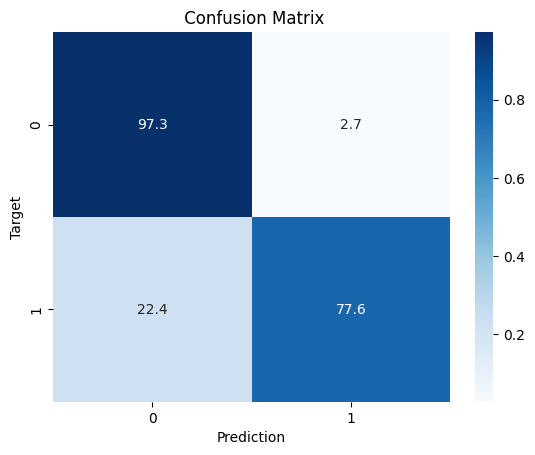

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Area under ROC score on  dataset: 0.82


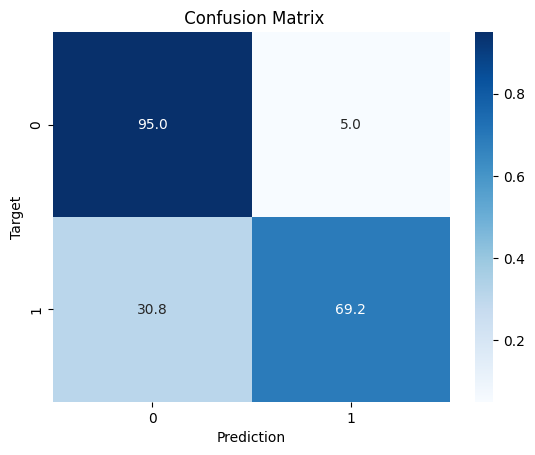

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2390
         1.0       0.78      0.69      0.73       610

    accuracy                           0.90      3000
   macro avg       0.85      0.82      0.83      3000
weighted avg       0.89      0.90      0.90      3000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv', index_col=0)

train_rest = raw_df.drop(columns=["Exited"])
train_tragets = raw_df["Exited"]

train_data, val_data, train_y, val_y = train_test_split(train_rest,
                                                        train_tragets,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=train_tragets
                                                        )

train_data = train_data.drop(columns=["CustomerId", "Surname"])
display(train_data)

# Виявляємо числові і категоріальні колонки
numeric_cols = train_data.select_dtypes(include=["int", "float"]).columns.tolist()
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()
print(categorical_cols)

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier()) # !!! Ось в чому відмінність
])

# Тренуємо пайплайн
model_pipeline.fit(train_data, train_y)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sns.heatmap(confusion_matrix_ , fmt=".1f", annot=confusion_matrix_*100, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline ,train_data ,train_y)
val_preds = predict_and_plot(model_pipeline ,val_data ,val_y)

# Звіт про класифікацію
print(classification_report(val_y, model_pipeline.predict(val_data)))

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = [
    LinearRegression(),
    Ridge(),
    Ridge(alpha=2),
    Lasso(),
    ElasticNet(),
    ElasticNet(alpha=0.5)
]


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = round(root_mean_squared_error(y_train, y_train_pred),6)
    test_metrics = round(root_mean_squared_error(y_test, y_test_pred), 6)

    return dict(train=train_metrics, test=test_metrics)


poly_features = PolynomialFeatures(degree=20)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


import warnings

warnings.filterwarnings("ignore")

for model in models:
    model.fit(X_train_poly, y_train)
    eval_results  = evaluate_model(model, X_train_poly, y_train, X_test_poly, y_test)
    print(f'{str(model)}: {eval_results}\n')

# Варіант з балансуванням класів

In [1]:
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, classification_report, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [25]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv', index_col=0)

train_df,  val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[2:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() #[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop =  'first', sparse_output=False, handle_unknown='infrequent_if_exist')
encoder.fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [33]:
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_targets
X_test = val_inputs[numeric_cols + encoded_cols]
y_test = val_targets

In [34]:
display(X_train), display(X_test)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
id,,,,,,,,,,,
7180,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,0.0,0.0,1.0
10393,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,0.0,0.0,0.0
80,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,1.0,0.0,1.0
3365,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,1.0,1.0
12236,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,0.0,0.0,0.0
8463,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,0.0,0.0,0.0
8143,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
id,,,,,,,,,,,
6490,0.675418,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,1.0,0.0,1.0
3646,0.386635,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,0.0,0.0,1.0
5306,0.715990,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,0.0,0.0,0.0
652,0.577566,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,0.0,0.0,0.0
2627,0.589499,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10550,0.589499,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,0.0,0.0,1.0
8866,0.768496,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,0.0,0.0,1.0
3244,0.589499,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,1.0,1.0


(None, None)

In [37]:
?PCA

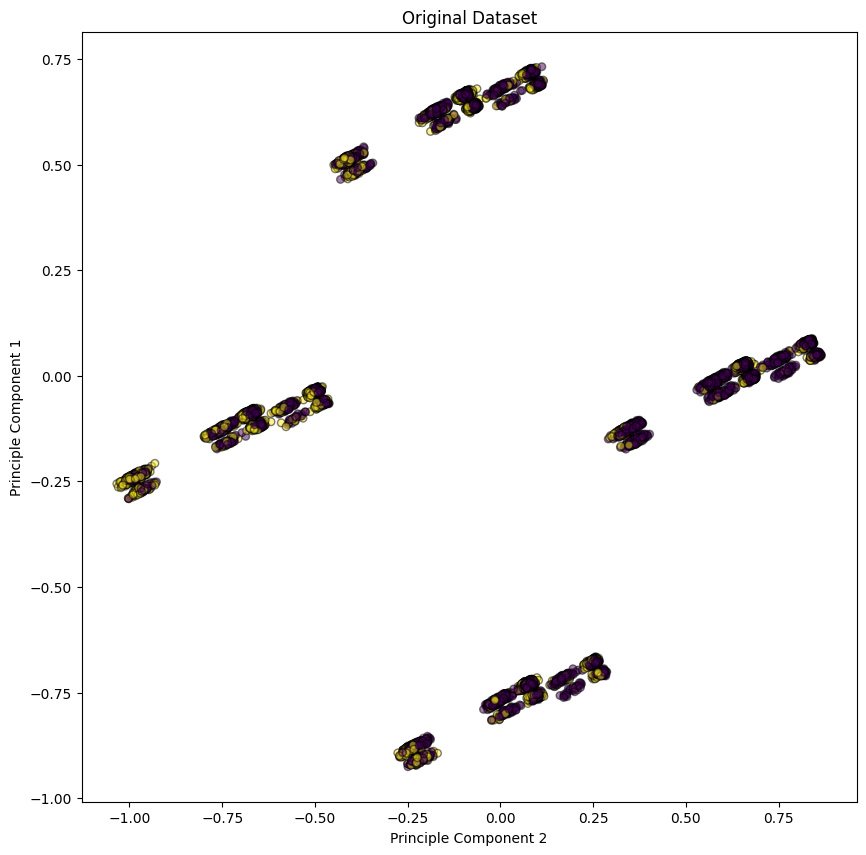

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Function for plotting dataset
def plot_data(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(10, 10))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

In [62]:
X_train_pca.shape

(12000, 10)

In [63]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

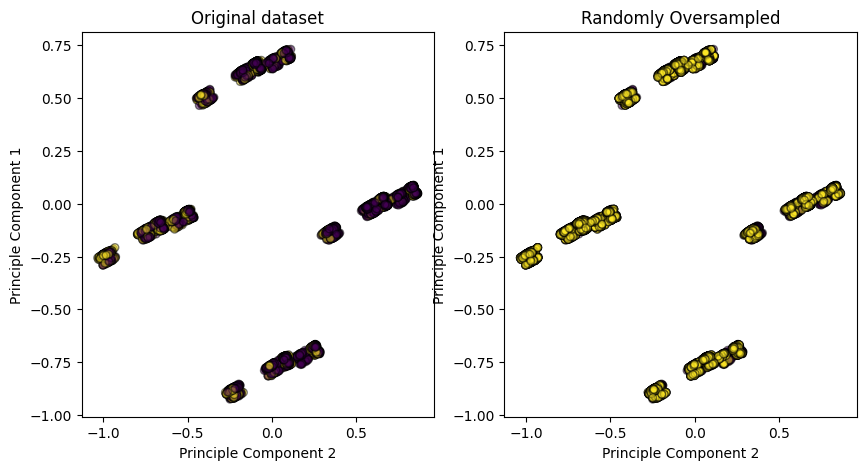

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
plot_data(X_train_pca, y_train, ax[0], 'Original dataset')
plot_data(X_train_ros, y_train_ros, ax[1], 'Randomly Oversampled')

In [64]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random sampling
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)

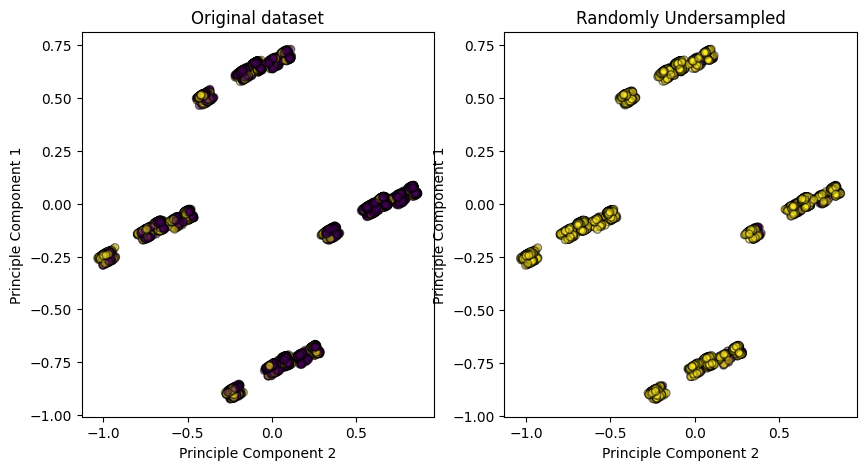

In [45]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
plot_data(X_train_pca, y_train, ax[0], 'Original dataset')
plot_data(X_train_rus, y_train_rus, ax[1], 'Randomly Undersampled')

In [65]:
? SVC

In [66]:
from sklearn.svm import SVC

# Train SVC on original data
clf = SVC(kernel='linear',probability=True)
clf.fit(X_train_pca, y_train)

# Train SVC on randomly oversampled data
clf_ros = SVC(kernel='linear',probability=True)
clf_ros.fit(X_train_ros, y_train_ros)

# Train SVC on randomly undersampled data
clf_rus = SVC(kernel='linear',probability=True)
clf_rus.fit(X_train_rus, y_train_rus)


SVC(kernel='linear', probability=True)

In [47]:
import numpy as np

def plot_decision_boundaries(X, y, clf, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20)
    ax.set_title(title)
    return scatter

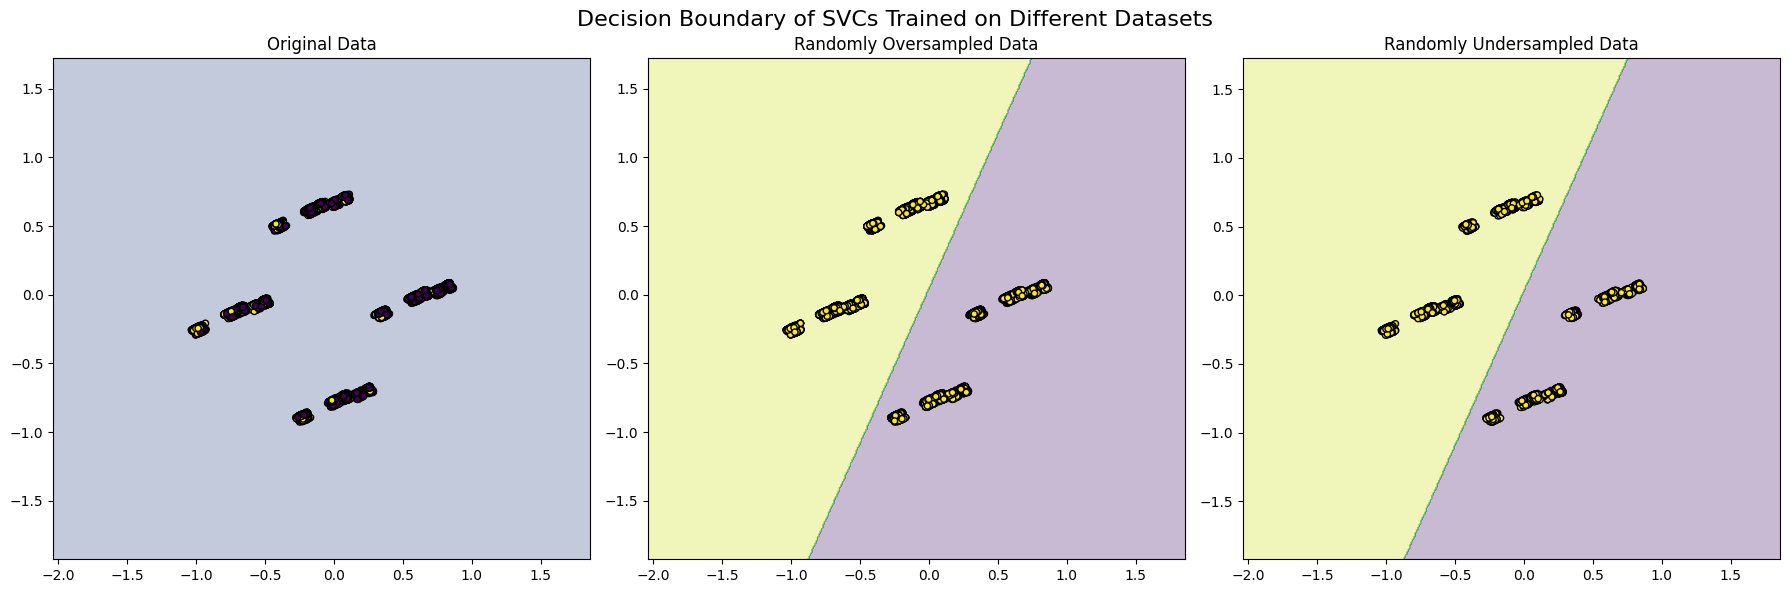

In [48]:
# Plot the decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundaries(X_train_pca, y_train, clf, axes[0], "Original Data")
plot_decision_boundaries(X_train_ros, y_train_ros, clf_ros, axes[1], "Randomly Oversampled Data")
plot_decision_boundaries(X_train_rus, y_train_rus, clf_rus, axes[2], "Randomly Undersampled Data")

fig.suptitle('Decision Boundary of SVCs Trained on Different Datasets', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [49]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Helper function for plotting ROC
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear',probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)


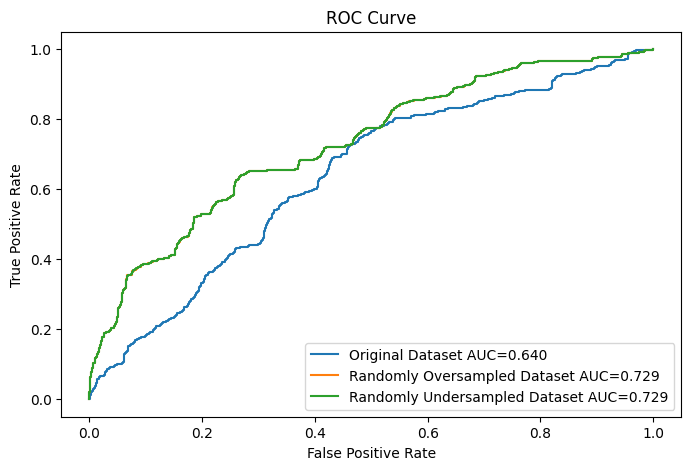

In [50]:
# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_ros, y_train_ros, X_test_pca, y_test, 'Randomly Oversampled Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersampled Dataset')

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC

# Perform random sampling
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Train linear SVC
clf_smote = SVC(kernel='linear',probability=True)
clf_smote.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', probability=True)

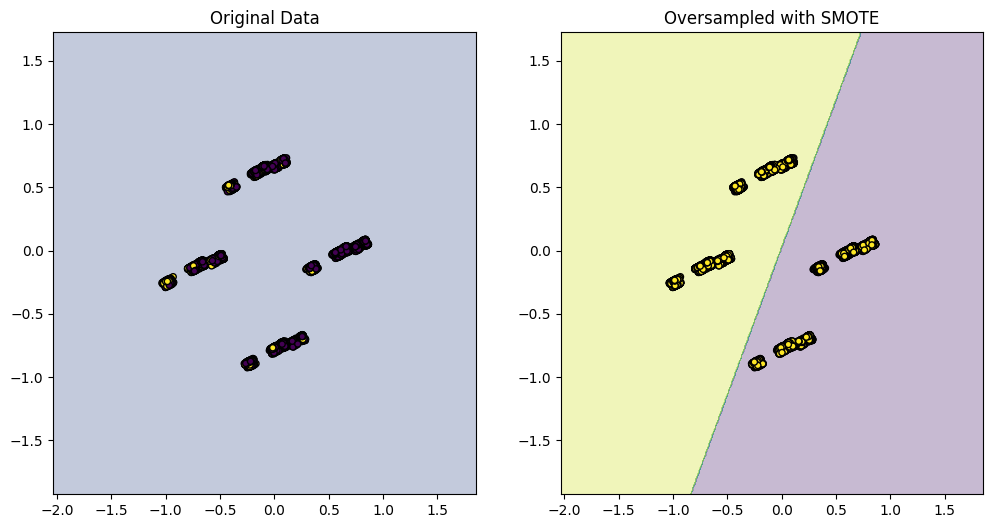

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundaries(X_train_pca, y_train, clf, axes[0], "Original Data")
plot_decision_boundaries(X_train_smote, y_train_smote, clf_smote, axes[1], "Oversampled with SMOTE");

In [53]:
from imblearn.over_sampling import ADASYN

# Perform random sampling
adasyn = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_pca, y_train)

# Train linear SVC
from sklearn.svm import SVC
clf_adasyn = SVC(kernel='linear',probability=True)
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

SVC(kernel='linear', probability=True)

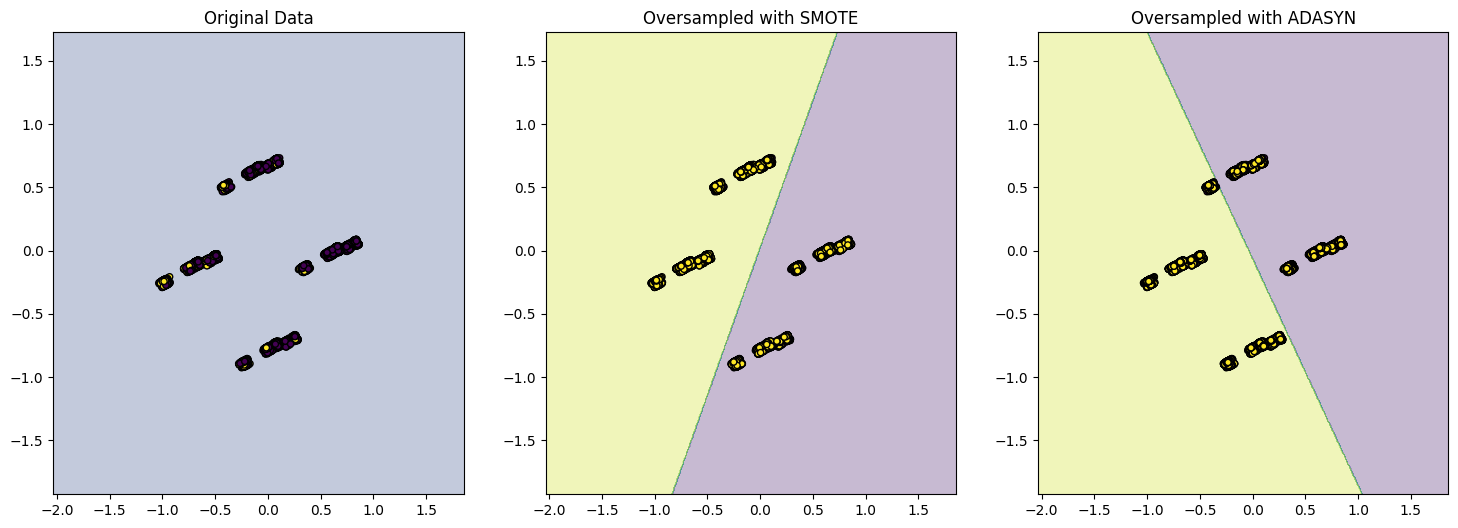

In [54]:
# Plot decision boundary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundaries(X_train_pca, y_train, clf, axes[0], "Original Data")
plot_decision_boundaries(X_train_smote, y_train_smote, clf_smote, axes[1], "Oversampled with SMOTE")
plot_decision_boundaries(X_train_adasyn, y_train_adasyn, clf_adasyn, axes[2], "Oversampled with ADASYN");

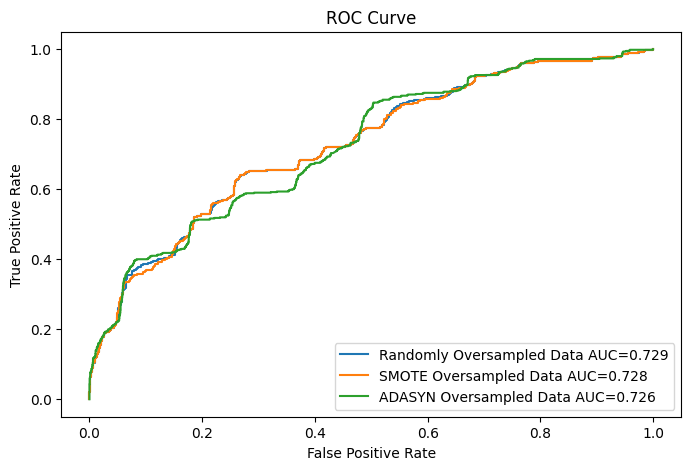

In [55]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train_ros, y_train_ros, X_test_pca, y_test, 'Randomly Oversampled Data')
plot_roc(ax, X_train_smote, y_train_smote, X_test_pca, y_test, 'SMOTE Oversampled Data')
plot_roc(ax, X_train_adasyn, y_train_adasyn, X_test_pca, y_test, 'ADASYN Oversampled Data');